In [1]:
import MeCab
with open('neko.txt') as data_file, open('neko.txt.mecab', mode='w') as out_file:
        mecab = MeCab.Tagger()
        out_file.write(mecab.parse(data_file.read()))

In [2]:
with open('neko.txt.mecab') as data_file:
    lines = data_file.readlines()
data_tmp = []
data = [[]]
for line in lines:
    surface_split = line.split('\t')
    if len(surface_split) > 1:
        node_split = surface_split[1].split(',')
        tmp = {
            'surface': surface_split[0],
            'base': node_split[6],
            'pos': node_split[0],
            'pos1': node_split[1]
        }
        data_tmp.append(tmp)
        if node_split[1] == '句点':
            data.append(data_tmp)
            data_tmp = []

In [3]:
verb_surface = []
for d in data:
    for w in d:
        if w['pos'] == '動詞':
#             print(w['surface'])
            verb_surface.append(w['surface'])

In [4]:
verb_base = []
for d in data:
    for w in d:
        if w['pos'] == '動詞':
            verb_base.append(w['base'])
#             print(w['base'])

In [5]:
suffix_noun = []
for d in data:
    for w in d:
        if w['pos1'] == 'サ変接続':
            suffix_noun.append(w['surface'])
#             print(w['surface'])

In [6]:
noun_phrase = []
for d in data:
    for n, w in enumerate(d):
        if d[n-1]['pos'] == '名詞':
            if w['surface'] == 'の':
                if d[n+1]['pos'] == '名詞':
                    noun_phrase.append(d[n-1]['surface'] + w['surface'] + d[n+1]['surface'])
#                     print(d[n-1]['surface'] + w['surface'] + d[n+1]['surface'])

In [7]:
max = 0
arg_d = 0
arg_w = 0
for n1, d in enumerate(data):
    count = 0
    for n2, w in enumerate(d):
        if w['pos'] == '名詞':
            count += 1
        else:
            if count >= max:
                max = count
                arg_d = n1
                arg_w = n2
            count = 0

for i in range(max):
    print(data[arg_d][arg_w-max+i]['surface'], end='')

明治三十八年何月何日戸締り

In [8]:
from collections import Counter
words = []
for d in data:
    for w in d:
        words.append(w['surface'])
appear_sort = Counter(words)
sorted_word = appear_sort.most_common()
# for word in sorted_word:
#     print(word)

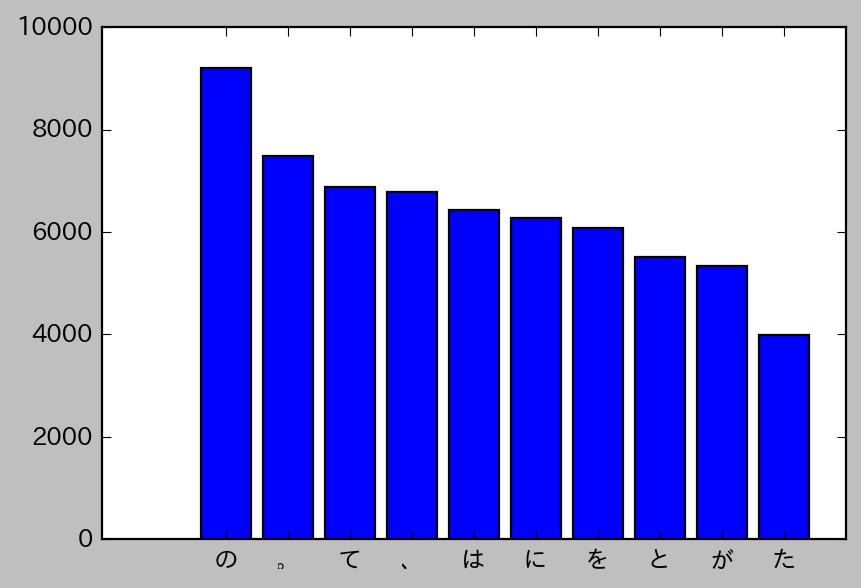

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

rank10_word = []
rank10_count = []
for r in sorted_word[0:10]:
    rank10_word.append(r[0])
    rank10_count.append(r[1])

plt.bar(range(10), rank10_count, tick_label = rank10_word, align='center')
plt.show()